Decision Tree

Tiatnic Survival Dataset

In [4]:
#Import the Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [6]:
#Load the data sets- train and test 
df=pd.read_csv('/home/rgukt-basar/Downloads/ML Lab/datasets/train_titanic.csv')

In [8]:
#Look at top values of train data 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
#Print the column names of train data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
#Print the dimension of train and test data
df.shape

(891, 12)

In [16]:
#Print the number of missing values in each column of train and test data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

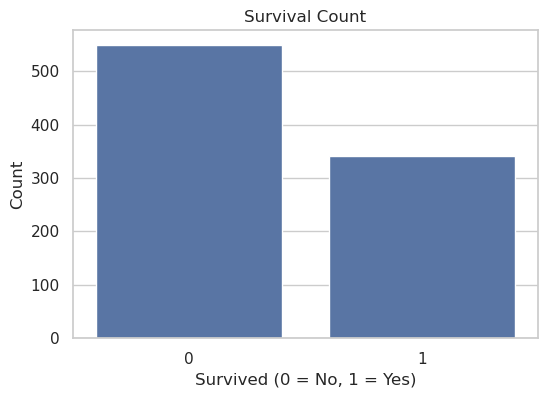

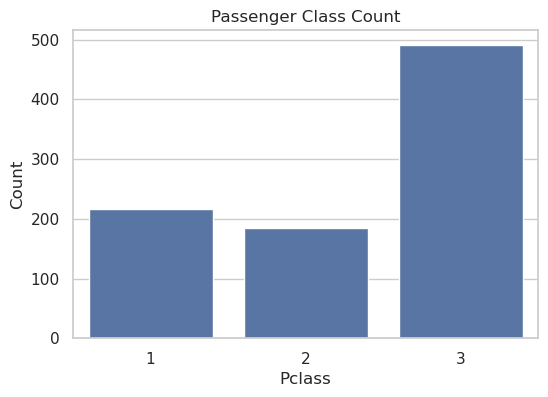

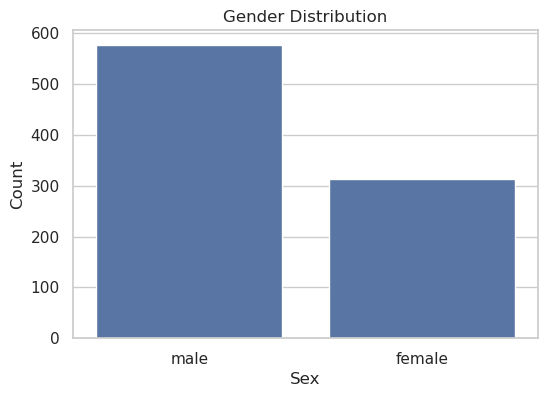

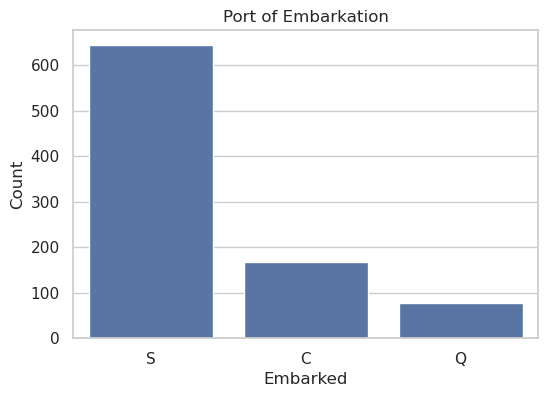

In [18]:
#Barchart of Survived, Pclass, Sex, Embarked
# Set style
sns.set(style="whitegrid")

# Plot 1: Survival Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Plot 2: Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass')
plt.title('Passenger Class Count')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Plot 3: Sex Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Plot 4: Embarked Port
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Embarked')
plt.title('Port of Embarkation')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

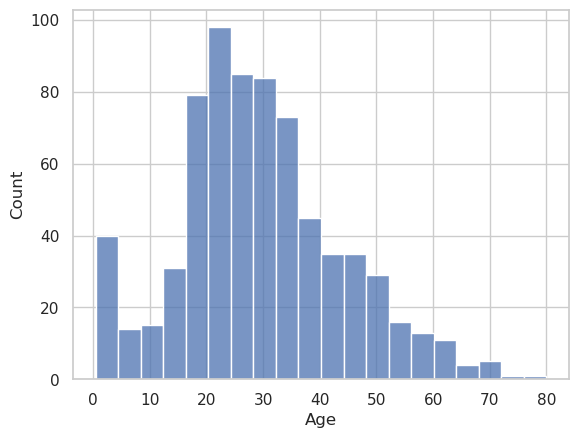

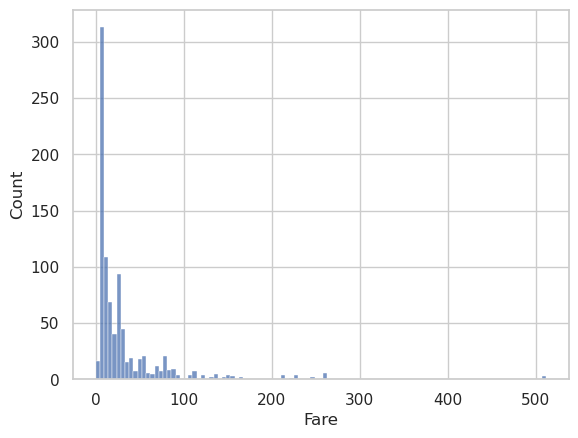

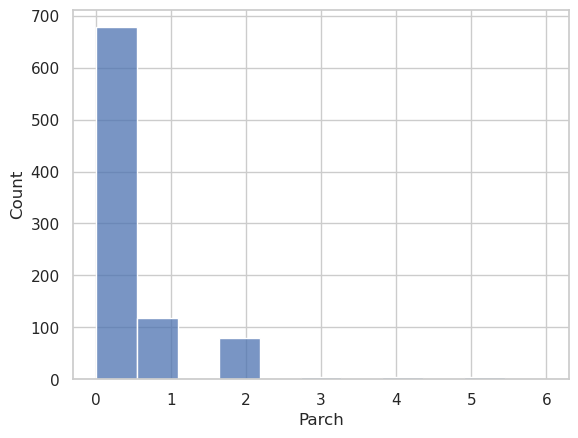

In [20]:
#Histogram of Age, Parch, Fare
sns.histplot(x='Age',data=df)
plt.show()
sns.histplot(x='Fare',data=df)
plt.show()
sns.histplot(x='Parch',data=df)
plt.show()

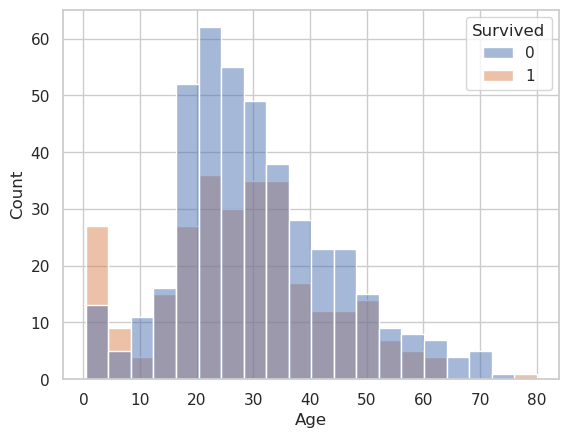

In [22]:
#Plot histogram of age for survived and did not survived class
sns.histplot(x='Age',hue='Survived',data=df)
plt.show()

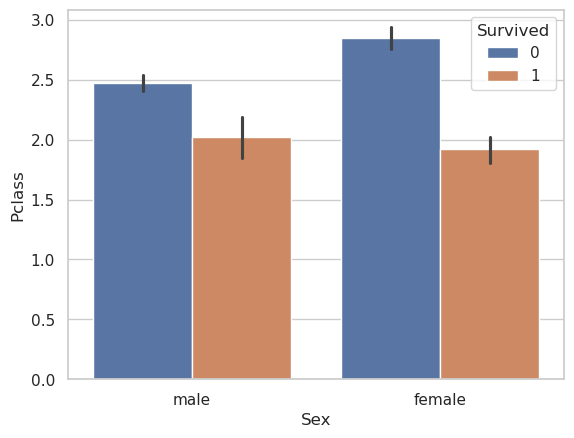

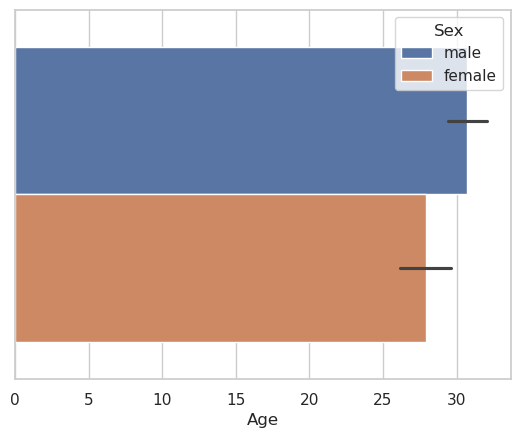

In [24]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers
sns.barplot(x='Sex',y='Pclass',hue='Survived',data=df)
plt.show()
sns.barplot(x='Age',hue='Sex',data=df)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

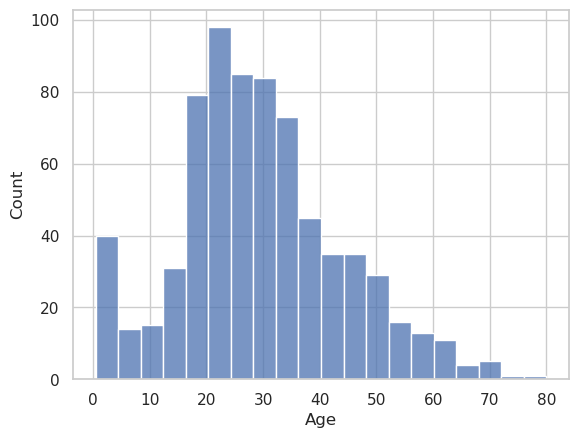

In [26]:
#Histogram of Age of the given data set(sample)
sns.histplot(x=df['Age'])

## Handling Missing Values

In [29]:
#Replace the msiing values in Embarked column by 'S'
df['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [31]:
#Impute the missing values in Fare column with median value
df['Fare'].fillna(df['Fare'].median(), inplace=True)



/tmp/ipykernel_15991/865401754.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)


In [33]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
age_mean = df['Age'].mean()
age_std = df['Age'].std()
num_null = df['Age'].isnull().sum()
random_ages = np.random.normal(loc=age_mean, scale=age_std, size=num_null)
df['Age'].fillna(pd.Series(random_ages))


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

## Feature Engineering - Creating new features

In [36]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df["FamilySize"]=df["Parch"]+df["SibSp"]+1

## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [39]:
df['Has_cabin'] = df['Cabin'].notna()
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1)

## Model Building

In [42]:
#Prepare X and y
X=df.drop(columns=['Survived'])
Y=df['Survived']

In [44]:
# Label encoding of categorical features
cat_col=df.select_dtypes(include=['object','category']).columns
label=LabelEncoder()
for col in cat_col:
  df[col]=label.fit_transform(df[col])

In [210]:
# concat df_categorical with original df
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Has_cabin
0,0,3,1,22.0,1,0,7.2500,2,2,False
1,1,1,0,38.0,1,0,71.2833,0,2,True
2,1,3,0,26.0,0,0,7.9250,2,1,False
3,1,1,0,35.0,1,0,53.1000,2,2,True
4,0,3,1,35.0,0,0,8.0500,2,1,False
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,False
887,1,1,0,19.0,0,0,30.0000,2,1,True
888,0,3,0,NaN,1,2,23.4500,2,4,False
889,1,1,1,26.0,0,0,30.0000,0,1,True


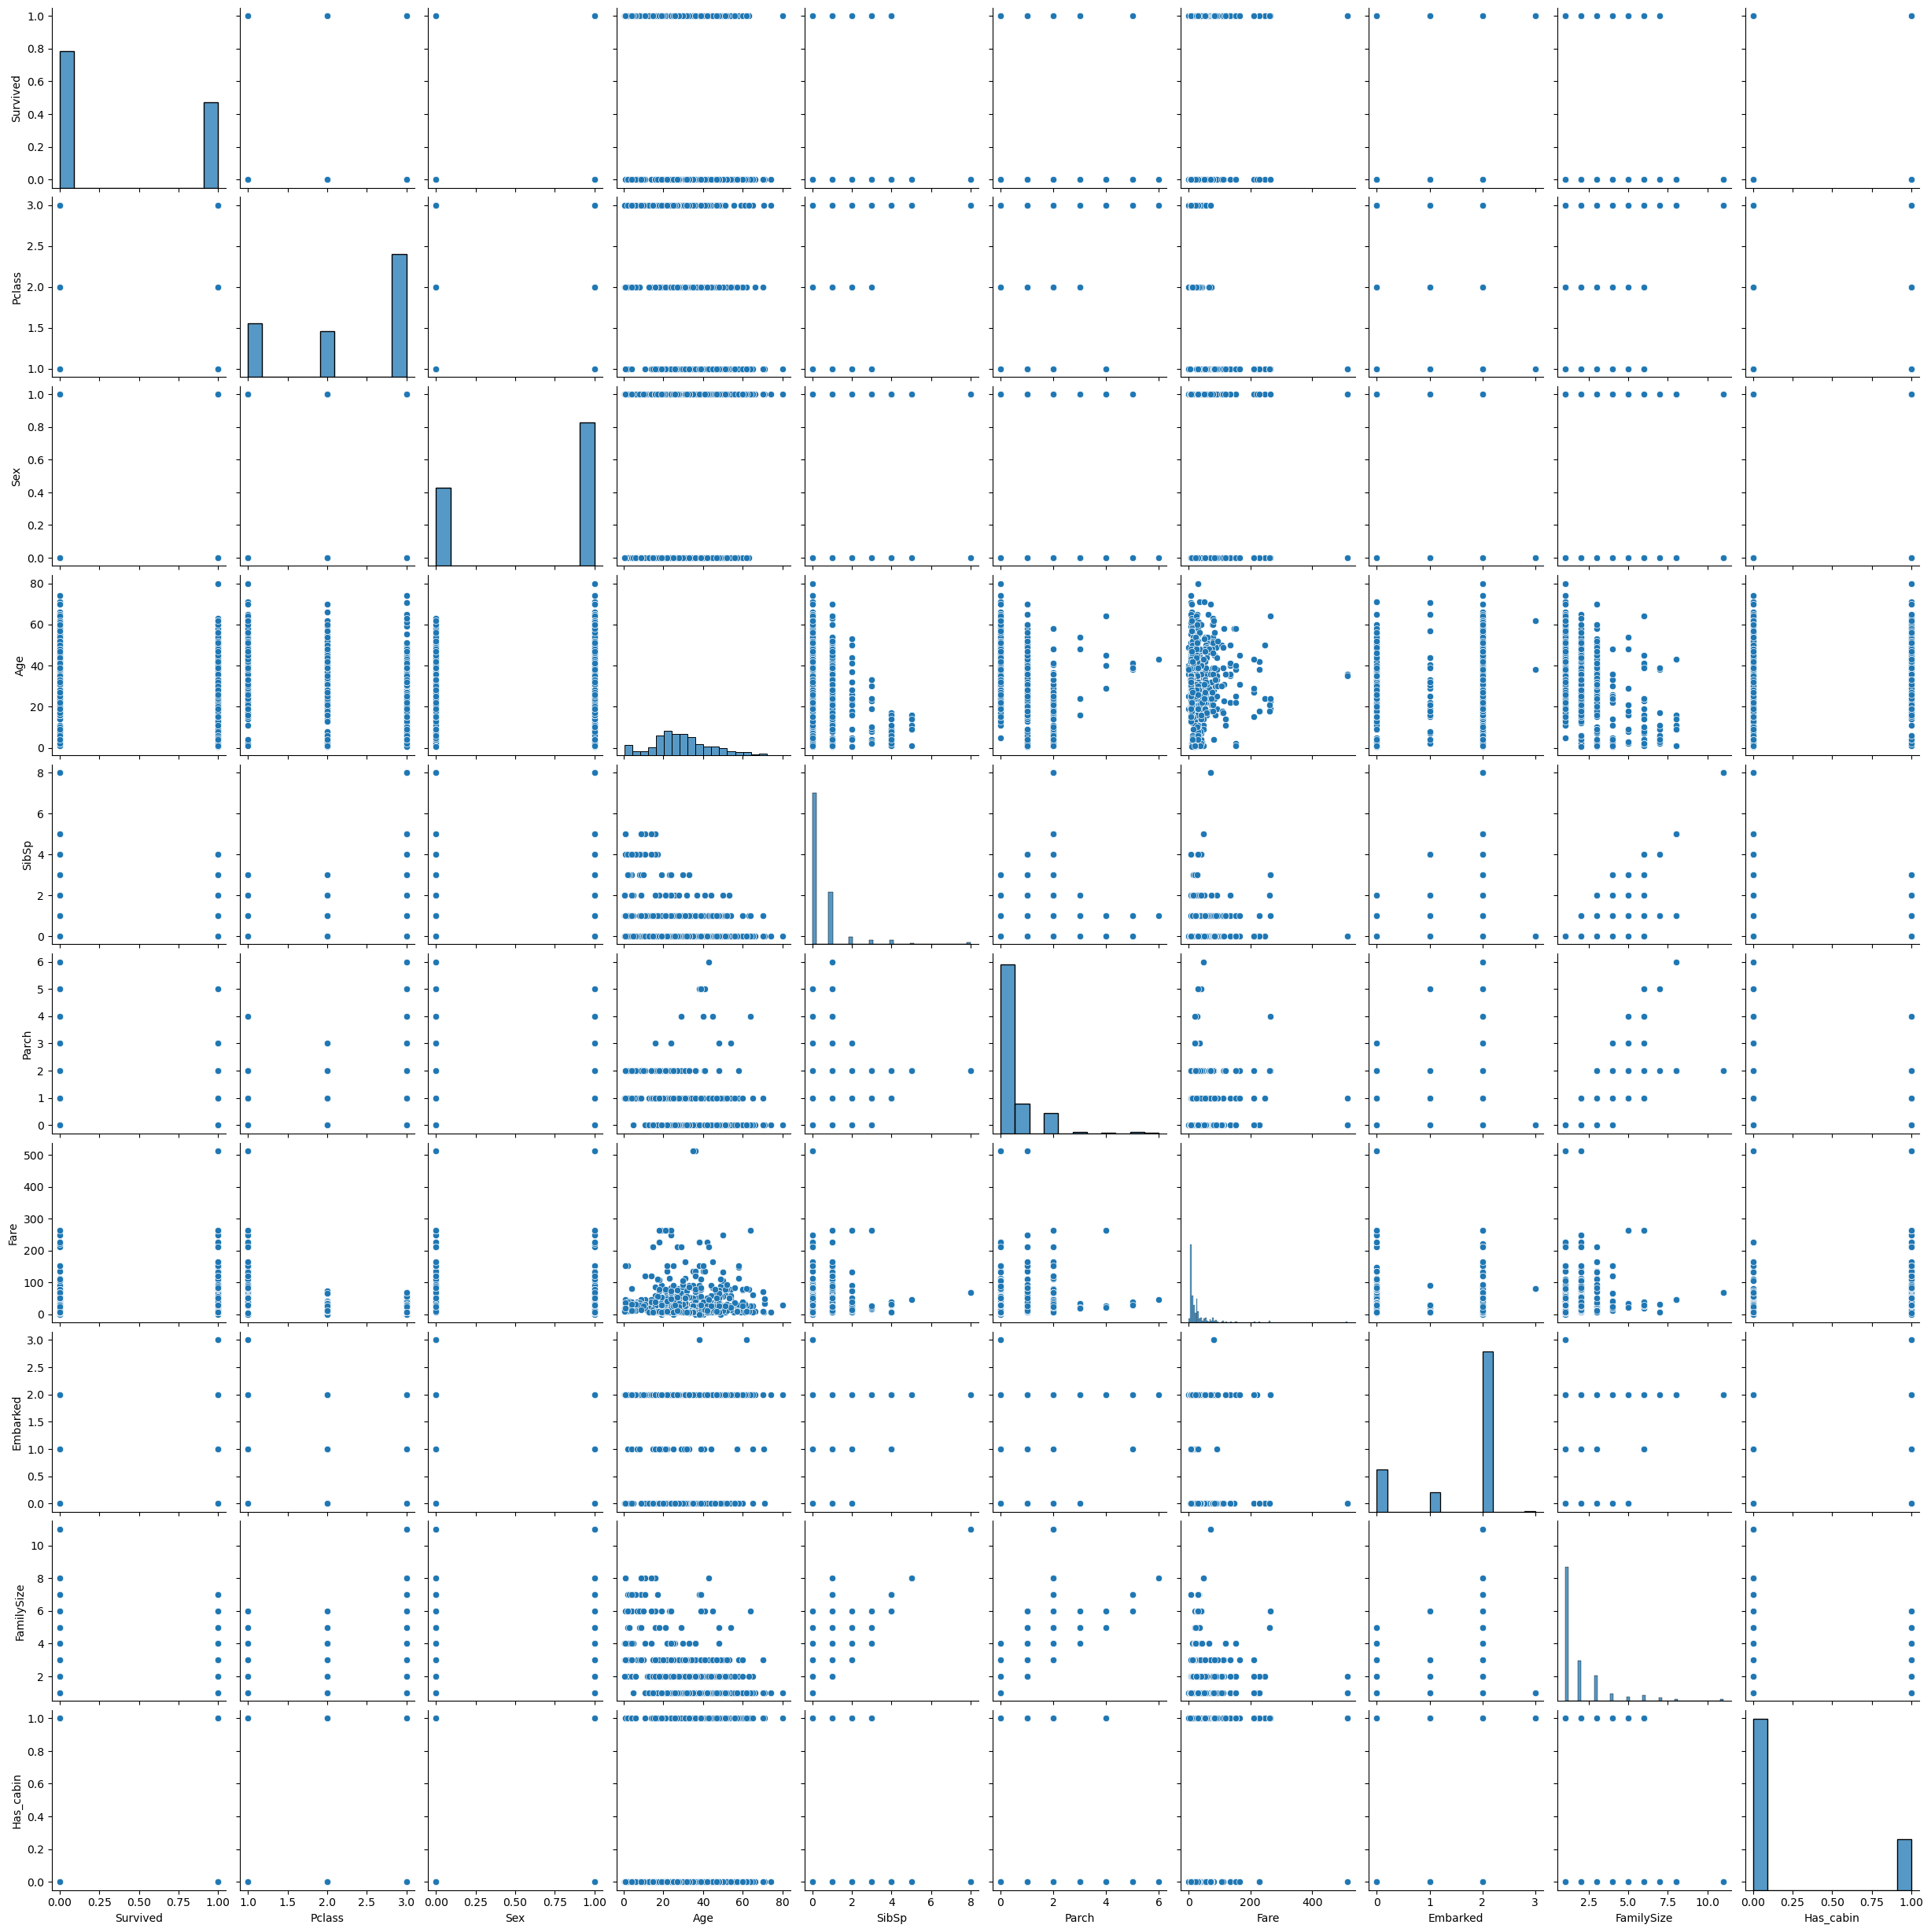

In [219]:
#Do a pairplot of all features
sns.pairplot(df)

In [239]:
X=df.drop(columns=['Survived'])
Y=df['Survived']
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Has_cabin
0,3,1,22.0,1,0,7.2500,2,2,False
1,1,0,38.0,1,0,71.2833,0,2,True
2,3,0,26.0,0,0,7.9250,2,1,False
3,1,0,35.0,1,0,53.1000,2,2,True
4,3,1,35.0,0,0,8.0500,2,1,False
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,1,False
887,1,0,19.0,0,0,30.0000,2,1,True
888,3,0,NaN,1,2,23.4500,2,4,False
889,1,1,26.0,0,0,30.0000,0,1,True


In [241]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
x_train, x_test, y_train, y_validation=train_test_split(X,Y,test_size=0.1,random_state=5)

In [243]:
# Create the model
model=DecisionTreeClassifier()
# Fitting the decision tree with default hyperparameters
model.fit(x_train,y_train)
# Importing decision tree classifier from sklearn library

DecisionTreeClassifier()

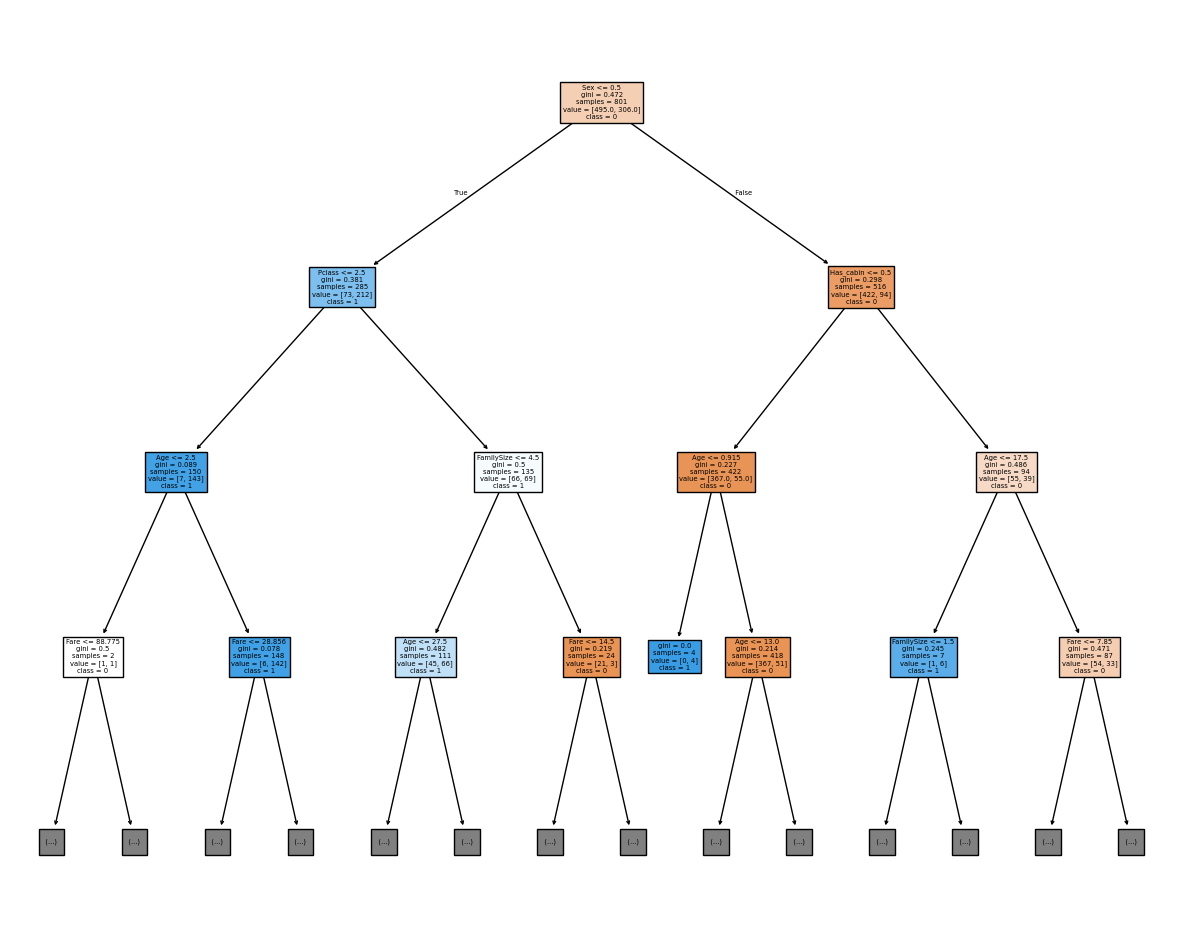

In [256]:
#Print the tree
from sklearn.tree import plot_tree
# Importing required packages for visualization
plt.figure(figsize=(15,12))
plot_tree(model,feature_names=x_train.columns,class_names=['0','1'],filled=True,max_depth=3)
plt.show()

In [ ]:
# plotting tree with max_depth=3

<img src="tree2.png">

In [262]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score
# Importing classification report and confusion matrix from sklearn metrics
# Making predictions
# Printing classification report
y_pred=model.predict(x_test)
c_m=confusion_matrix(y_validation,y_pred)
acc=accuracy_score(y_validation,y_pred)
classification=classification_report(y_validation,y_pred)
print(c_m)
print(acc)
print(classification)

[[45  9]
 [12 24]]
0.7666666666666667
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        54
           1       0.73      0.67      0.70        36

    accuracy                           0.77        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.76      0.77      0.76        90



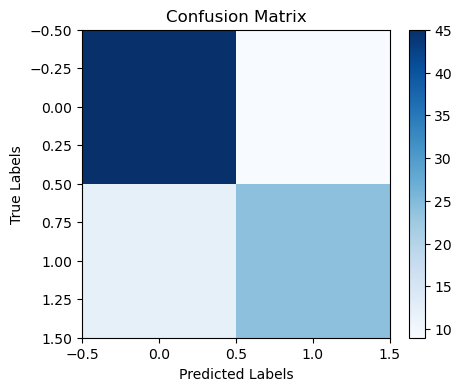

In [264]:
# Printing confusion matrix and accuracy
plt.figure(figsize=(5,4))
plt.imshow(c_m, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()